# Problem Statement 
## Clustering Countries based on socio-economic status

**Data**
   - country, Name of the country
   - child_mort, Death of children under 5 years of age per 1000 live births
   - exports, Exports of goods and services per capita. Given as %age of the GDP per capita
   - health, Total health spending per capita. Given as %age of GDP per capita
   - imports, Imports of goods and services per capita. Given as %age of the GDP per capita
   - Income, Net income per person
   - Inflation, The measurement of the annual growth rate of the GDP deflator
   - life_expec, The average number of years a new born child would live if the current mortality patterns are to remain the same
   - total_fer, The number of children that would be born to each woman if the current age-fertility rates remain the same.
   - gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.

# Setup

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('fivethirtyeight')
sns.set_style('dark')
sns.set_context('notebook')

# Data

## Importing Data for optimizatiton

   - Import 100 lines of data
   - Downcast datatype of continuous variable columns
   - Store the resultant datatype to import complete data

In [4]:
countries = pd.read_csv('Country-data.csv', nrows = 100)
countries.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
countries.shape

(100, 10)

In [6]:
#Modifying the columns in percentage to absolute values
#exports, health & imports

col_list = ['exports', 'health', 'imports']
for i in col_list:
    countries[i] = countries[i] * countries['gdpp']
    
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610,9.44,56.2,5.82,553
1,Albania,16.6,114520.0,26789.50,198774.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,171264.0,18598.20,140044.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,219919.0,10060.50,151437.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100,1.44,76.8,2.13,12200


In [7]:
#Checking the standard datatype
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     100 non-null    object 
 1   child_mort  100 non-null    float64
 2   exports     100 non-null    float64
 3   health      100 non-null    float64
 4   imports     100 non-null    float64
 5   income      100 non-null    int64  
 6   inflation   100 non-null    float64
 7   life_expec  100 non-null    float64
 8   total_fer   100 non-null    float64
 9   gdpp        100 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.9+ KB


In [8]:
#Downcasting datatypes

countries['child_mort'] = pd.to_numeric(countries['child_mort'], downcast='float')
countries['exports'] = pd.to_numeric(countries['exports'], downcast='float')
countries['health'] = pd.to_numeric(countries['health'], downcast='float')
countries['imports'] = pd.to_numeric(countries['imports'], downcast='float')
countries['income'] = pd.to_numeric(countries['income'], downcast='unsigned')
countries['inflation'] = pd.to_numeric(countries['inflation'], downcast='float')
countries['life_expec'] = pd.to_numeric(countries['life_expec'], downcast='float')
countries['total_fer'] = pd.to_numeric(countries['total_fer'], downcast='float')
countries['gdpp'] = pd.to_numeric(countries['gdpp'], downcast='unsigned')

In [9]:
#Storing the dtypes
dtypes = countries.dtypes
colnames = dtypes.index
types = [i.name for i in dtypes.values]

column_types = dict(zip(colnames, types))

In [10]:
column_types

{'country': 'object',
 'child_mort': 'float32',
 'exports': 'float32',
 'health': 'float32',
 'imports': 'float32',
 'income': 'uint32',
 'inflation': 'float32',
 'life_expec': 'float32',
 'total_fer': 'float32',
 'gdpp': 'uint32'}

## Importing optimized data

In [11]:
countries = pd.read_csv('Country-data.csv', dtype = column_types)
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.199997,10.000000,7.58,44.900002,1610,9.44,56.200001,5.82,553
1,Albania,16.600000,28.000000,6.55,48.599998,9930,4.49,76.300003,1.65,4090
2,Algeria,27.299999,38.400002,4.17,31.400000,12900,16.10,76.500000,2.89,4460
3,Angola,119.000000,62.299999,2.85,42.900002,5900,22.40,60.099998,6.16,3530
4,Antigua and Barbuda,10.300000,45.500000,6.03,58.900002,19100,1.44,76.800003,2.13,12200


In [12]:
countries.shape

(167, 10)

In [13]:
#Downcasted datatype to optimize memory
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float32
 2   exports     167 non-null    float32
 3   health      167 non-null    float32
 4   imports     167 non-null    float32
 5   income      167 non-null    uint32 
 6   inflation   167 non-null    float32
 7   life_expec  167 non-null    float32
 8   total_fer   167 non-null    float32
 9   gdpp        167 non-null    uint32 
dtypes: float32(7), object(1), uint32(2)
memory usage: 7.3+ KB


## EDA

- Value range overview
- Missing values
- Modifying the export, health, imports from percentage to absolute values
- Distribution plots for segmentation (Profiling variable)
- Multivariate Analysis

In [14]:
#Checking for missing values in data
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are **no missing values** in the data

In [15]:
#Modifying the columns in percentage to absolute values
#exports, health & imports

col_list = ['exports', 'health', 'imports']
for i in col_list:
    countries[i] = countries[i] * countries['gdpp']
    
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.199997,5530.000000,4191.739958,24829.700844,1610,9.44,56.200001,5.82,553
1,Albania,16.600000,114520.000000,26789.500780,198773.993759,9930,4.49,76.300003,1.65,4090
2,Algeria,27.299999,171264.006805,18598.200340,140043.998299,12900,16.10,76.500000,2.89,4460
3,Angola,119.000000,219918.997307,10060.499663,151437.005386,5900,22.40,60.099998,6.16,3530
4,Antigua and Barbuda,10.300000,555100.000000,73566.002560,718580.018616,19100,1.44,76.800003,2.13,12200


In [16]:
#Numerical value range
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270065,7.420619e+05,105673.319425,6.588352e+05,17144.688623,7.781830,70.555679,2.947964,12964.155689
std,40.328930,1.797389e+06,180140.887691,1.471081e+06,19278.067698,10.570704,8.893172,1.513847,18328.704809
min,2.600000,1.076920e+02,1282.120041,6.510920e+01,609.000000,-4.210000,32.099998,1.150000,231.000000
25%,8.250000,4.471400e+04,7853.549849,6.402150e+04,3355.000000,1.810000,65.300003,1.795000,1330.000000
50%,19.299999,1.777440e+05,32188.600693,2.045580e+05,9960.000000,5.390000,73.099998,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.001770,7.719600e+05,22800.000000,10.750000,76.800003,3.880000,14050.000000
max,208.000000,1.837500e+07,866359.981537,1.491000e+07,125000.000000,104.000000,82.800003,7.490000,105000.000000


**Percentage** wise comparison is not giving a realistic image of the scenario. Hence it was necessary in converting them to absolute scale

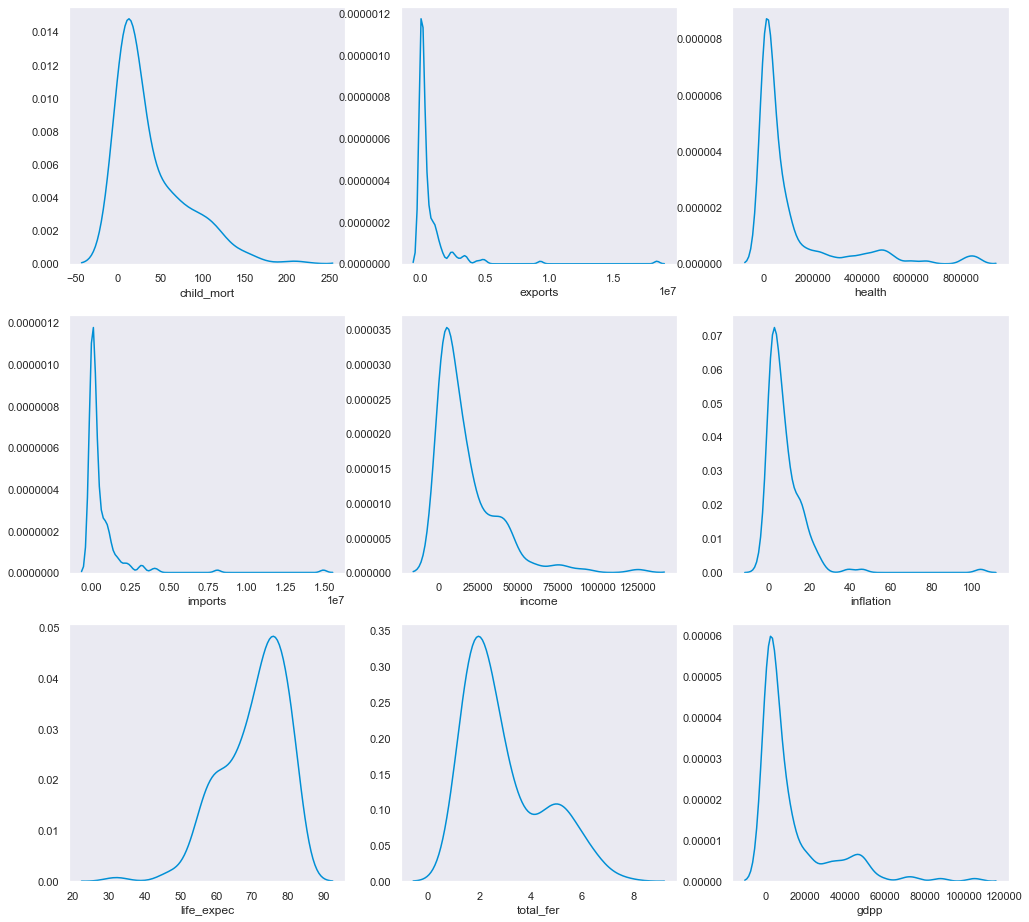

In [17]:
#Distribution plot for profiling variable

col = countries.columns[1:]

plt.figure(figsize= (15, 15))
for i in enumerate(col):
    plt.subplot(3, 3, i[0]+1)
    sns.distplot(countries[i[1]], kde = True, hist=False)

Distinct clusters can be identified using **gdpp, income, child_mort**

In [18]:
#Multivariate Analysis
#Low GDP
low_gdp_df = countries.sort_values(by = 'gdpp', ascending = True).head(25)
low_gdp_df.set_index('country', inplace = True)
low_gdp_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Burundi,93.599998,2060.520018,2679.600088,9055.200176,764,12.300000,57.700001,6.26,231
Liberia,89.300003,6245.700125,3858.600062,30280.199501,700,5.470000,60.799999,5.02,327
"Congo, Dem. Rep.",116.000000,13727.399490,2641.939949,16566.399490,609,20.799999,57.500000,6.54,334
Niger,123.000000,7725.600266,1795.679947,17086.799469,814,2.550000,58.799999,7.49,348
Sierra Leone,160.000000,6703.199696,5226.900152,13765.500000,1220,17.200001,55.000000,5.20,399


In [19]:
#Multivariate Analysis
#High GDP
high_gdp_df = countries.sort_values(by = 'gdpp', ascending = False).head(25)
high_gdp_df.set_index('country', inplace = True)
high_gdp_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Luxembourg,2.8,1.837500e+07,815849.997997,1.491000e+07,91700,3.620,81.300003,1.63,105000
Norway,3.2,3.485660e+06,832343.959808,2.502300e+06,62300,5.950,81.000000,1.95,87800
Switzerland,4.5,4.774400e+06,857900.000000,3.976180e+06,55500,0.317,82.199997,1.52,74600
Qatar,9.0,4.379690e+06,127242.995977,1.673140e+06,125000,6.980,79.500000,2.07,70300
Denmark,4.1,2.929000e+06,661199.977875,2.528800e+06,44000,3.220,79.500000,1.87,58000


In the multivariate analysis, we will take the GDP as the reference parameter and observe how other parameters contribute.
We have created two dataframe
   - Top 25 countries with low gdpp
   - Top 25 countries with high gdpp

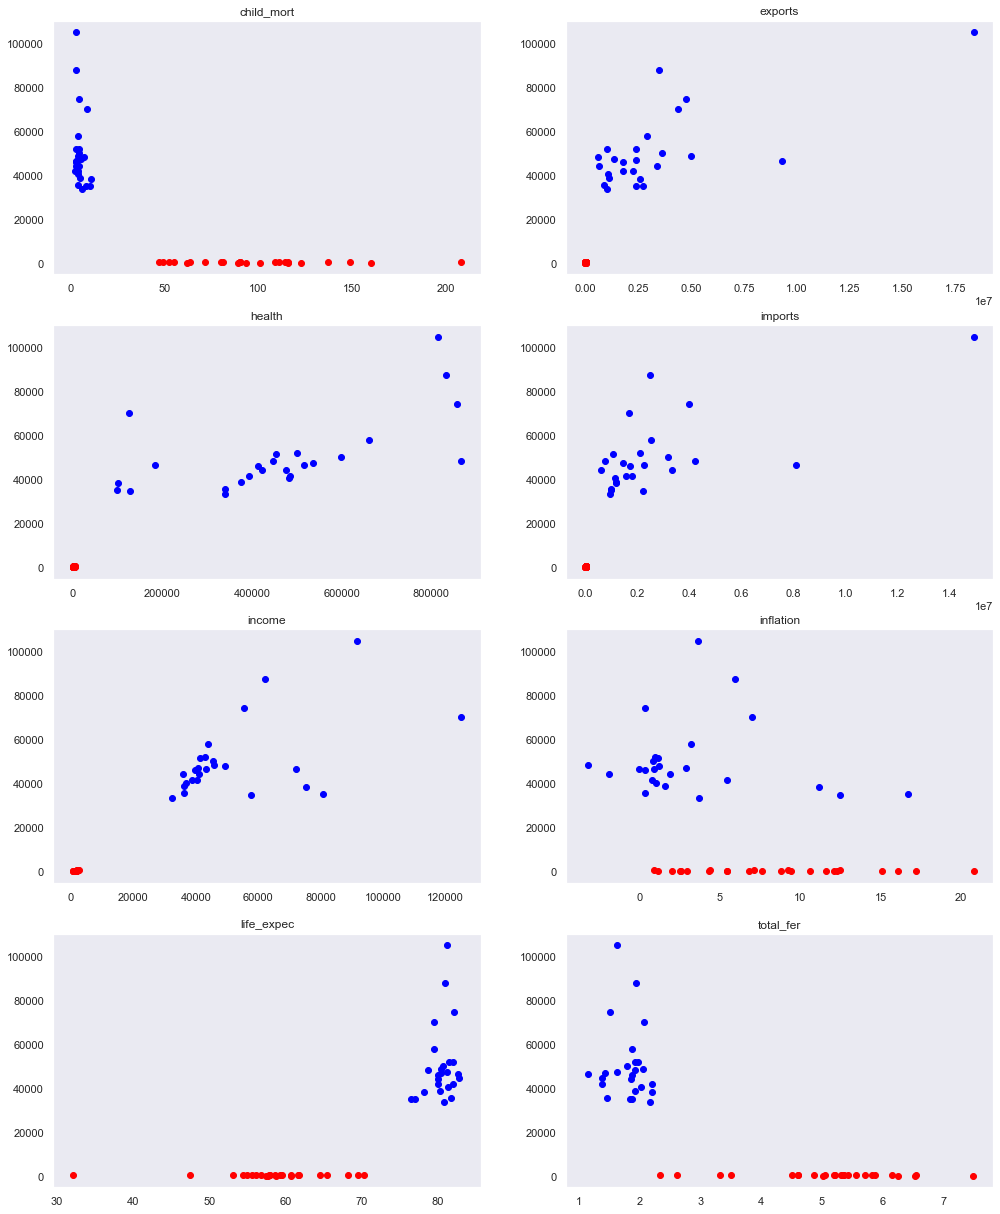

In [20]:
col_list = low_gdp_df.columns
col_list = col_list[:-1]

plt.figure(figsize= (15,20))
for i in enumerate(col_list):
    plt.subplot(4, 2, i[0]+1)
    plt.scatter(i[1], 'gdpp', data = low_gdp_df, c = 'r')
    plt.scatter(i[1], 'gdpp', data = high_gdp_df, c = 'b')
    plt.title(i[1])

**Assessment :** Countries with low GDPP have
                   - Very High child_mort
                   - Very Low Exports
                   - Very Low expenditure on health
                   - Very Low imports
                   - Very Low income
                   - High inflation
                   - Life expec not greater than 70
                   - Very High fert

In [21]:
#Multivariate Analysis
#Low Export
low_exp_df = countries.sort_values(by = 'exports', ascending = True).head(25)
low_exp_df.set_index('country', inplace = True)
low_exp_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Myanmar,64.400002,107.691997,1946.360028,65.109198,3720,7.04,66.800003,2.41,988
Burundi,93.599998,2060.520018,2679.600088,9055.200176,764,12.30,57.700001,6.26,231
Eritrea,55.200001,2308.779982,1282.120041,11230.599632,1420,11.60,61.700001,4.61,482
Central African Republic,149.000000,5262.800085,1775.080009,11819.000000,888,2.01,47.500000,5.21,446
Afghanistan,90.199997,5530.000000,4191.739958,24829.700844,1610,9.44,56.200001,5.82,553


In [22]:
#Multivariate Analysis
#High Export
high_exp_df = countries.sort_values(by = 'exports', ascending = False).head(25)
high_exp_df.set_index('country', inplace = True)
high_exp_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Luxembourg,2.8,1.837500e+07,815849.997997,1.491000e+07,91700,3.620,81.300003,1.63,105000
Singapore,2.8,9.320000e+06,184536.001778,8.108400e+06,72100,-0.046,82.699997,1.15,46600
Ireland,4.2,5.016100e+06,447552.979565,4.212550e+06,45700,-3.220,80.400002,2.05,48700
Switzerland,4.5,4.774400e+06,857900.000000,3.976180e+06,55500,0.317,82.199997,1.52,74600
Qatar,9.0,4.379690e+06,127242.995977,1.673140e+06,125000,6.980,79.500000,2.07,70300


In the multivariate analysis, we will take the exports as the reference parameter and observe how other parameters contribute.
We have created two dataframe
   - Top 25 countries with low export
   - Top 25 countries with high export

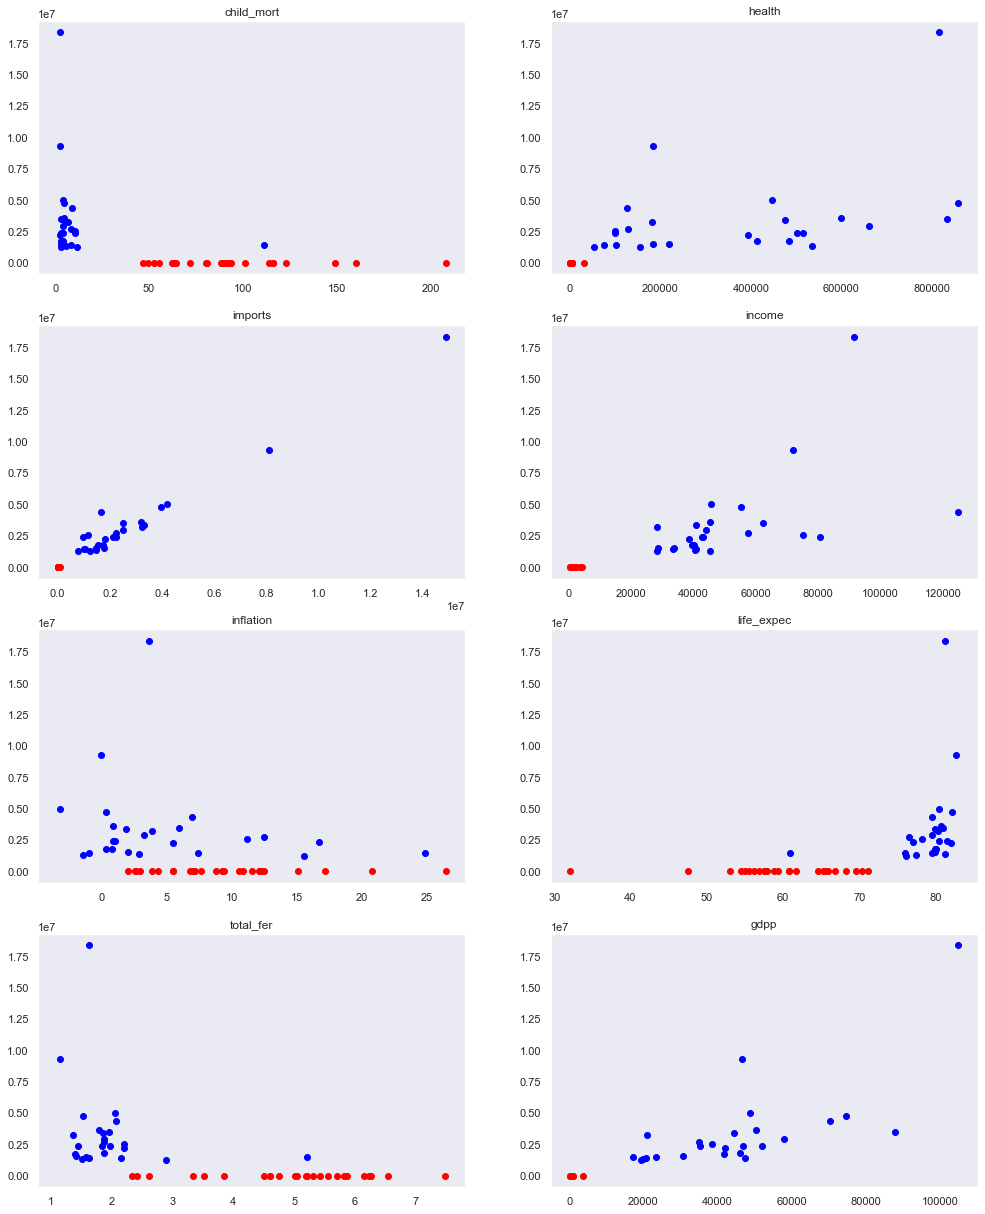

In [23]:
col_list = low_exp_df.drop('exports', axis = 1).columns

plt.figure(figsize= (15,20))
for i in enumerate(col_list):
    plt.subplot(4, 2, i[0]+1)
    plt.scatter(i[1], 'exports', data = low_exp_df, c = 'r')
    plt.scatter(i[1], 'exports', data = high_exp_df, c = 'b')
    plt.title(i[1])

**Assessment :** Countries with low exports have
                   - Very High child_mort
                   - Very Low expenditure on health
                   - Very Low imports
                   - Very Low income
                   - High inflation
                   - Life expec not greater than 70
                   - Very High fert
                   - Very low gdpp

In [106]:
#Lowest & Highest Indicator

col_name = countries.drop('country', axis=1).columns
data_list =[]

for i in enumerate(col_name):
    val_list = []
    val_list.append(i[1])
    val_list.append(round(countries[i[1]].mean(), 2))
    val_list.append(countries.loc[countries[countries[i[1]] == countries[i[1]].max()].index , 
                                  'country'].at[int(str(countries[countries[i[1]] == countries[i[1]].max()].index).split('[')[1][0:3].rstrip(']'))])
    val_list.append(round(countries[i[1]].max(), 2))
    val_list.append(countries.loc[countries[countries[i[1]] == countries[i[1]].min()].index , 
                                  'country'].at[int(str(countries[countries[i[1]] == countries[i[1]].min()].index).split('[')[1][0:3].rstrip(']'))])
    val_list.append(round(countries[i[1]].min(), 2))
    data_list.append(val_list)
    
new_df = pd.DataFrame(data_list, columns =  ['Parameter', 'Avg Value', 'Max Country', 'Max Value', 'Min Country', 'Min Value'])
new_df

,Parameter,Avg Value,Max Country,Max Value,Min Country,Min Value
0,child_mort,38.27,Haiti,208.00,Iceland,2.60
1,exports,742061.89,Luxembourg,18375000.00,Myanmar,107.69
2,health,105673.32,United States,866359.98,Eritrea,1282.12
3,imports,658835.21,Luxembourg,14910000.00,Myanmar,65.11
4,income,17144.69,Qatar,125000.00,"Congo, Dem. Rep.",609.00
5,inflation,7.78,Nigeria,104.00,Seychelles,-4.21
6,life_expec,70.56,Japan,82.80,Haiti,32.10
7,total_fer,2.95,Niger,7.49,Singapore,1.15
8,gdpp,12964.16,Luxembourg,105000.00,Burundi,231.00


**Assessment** - The above data will help to decide the countries if a specific parameter is set as a target for improvement, on which countries initially funding has to happen and from which countries the policies and methodology can be derived as they have reached the highest output in the world.

## Outlier Treatment

In [ ]:
#Outlier Treatement

col_list = countries.drop('country', axis =1).columns

plt.figure(figsize = (15, 15))
for i in enumerate(col_list):
    plt.subplot(3, 3, i[0]+1)
    plt.boxplot(i[1], data = countries)
    plt.title(i[1])

Outlier Treatement - Here we will use soft capping method to treat outliers for a quicker convergence.
The variables with Max value capping
   - exports
   - health
   - imports
   - income
   - gdpp

In [ ]:
out_list = ['exports', 'health', 'imports', 'income', 'gdpp']

for i in out_list:
    print(countries[i].quantile([0.9, 0.93, 0.95, 0.97, 0.975, 0.98, 0.99]))
    print('IQR', countries[i].quantile(0.75) + (1.5 * (countries[i].quantile(0.75) - countries[i].quantile(0.25))))

We will choose **0.95** as our soft capping range based on the above data

In [ ]:
#Capping all value greater than 0.95 to q1
for i in out_list:
    q1 = countries[i].quantile(0.95)
    countries[i][countries[i]>=q1] = q1

In [ ]:
#Outlier Treatement
#Post Treatment Result
col_list = countries.drop('country', axis =1).columns

plt.figure(figsize = (15, 15))
for i in enumerate(col_list):
    plt.subplot(3, 3, i[0]+1)
    plt.boxplot(i[1], data = countries)
    plt.title(i[1])

## Hopkins Value

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(countries.drop('country', axis =1))

**Assessment :** Hopkins value is ranging between **0.87 - 0.93**. Hence it is very good for clustering

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_countries = scaler.fit_transform(countries.drop('country', axis = 1))
scaled_countries = pd.DataFrame(scaled_countries, columns = countries.columns[1:])
scaled_countries.head()

# Clustering

## K- Means

### Silhoutte Score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette Analysis
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_countries)
    ss.append([k, silhouette_score(scaled_countries, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

**Assessment:** The value is high for k = 3 

### Elbow Curve

In [ ]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_countries)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

**Assessment:** Distict slopes at 3 and 5. <br>
Therefore using Elbow curve & Silhoutte score choosing **k = 3**

### K-Means with k=3

In [ ]:
#Number of cluster = 3
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(scaled_countries)

In [ ]:
#Labeling the cluster_id in original df
countries['cluster_id'] = kmean.labels_
countries.head()

In [ ]:
# Check the number of Data Points in each cluster
countries.cluster_id.value_counts()

**Assessment:** It is a balanced clustering and not skewed

In [ ]:
#Plotting the Cluster
prof_col = ['gdpp','child_mort','income']

plt.figure(figsize = (15, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = countries, palette ='Set1')
plt.subplot(3, 1, 2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = countries, palette ='Set1')
plt.subplot(3, 1, 3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = countries, palette ='Set1')
plt.plot()

### Result of K-means

In [ ]:
#Cluster Profiling
#Based on the business case - we need countries with Low GDPP, Low Income & High Child_Mort

countries[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean()

In [ ]:
plt.figure(figsize = (15, 15))
for i in enumerate(prof_col):
    plt.subplot(3, 1, i[0]+1)
    sns.barplot(x = 'cluster_id', y = i[1], data = countries)

**Assessment** - The **cluster 0** matches out business requirement

### Countries need of Aid

In [ ]:
aid_needed = countries[countries['cluster_id'] == 0]
print('Total countries : ', aid_needed.shape[0])
aid_needed.head()

In [ ]:
#Sorting the df
prof_col = ['gdpp','income','child_mort']
aid_needed.sort_values(by = prof_col, ascending = [True, True, False]).head(10)

**Assessment** - `Burundi, Liberia, Congo,Dem. Rep, Niger, Sierra Leone, Madagascar, Mozambique, Central African Republic, Malawi, Eritrea` are the countries that are in need for financial aid

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# single linkage
mergings = linkage(scaled_countries, method="single", metric='cityblock')
dendrogram(mergings)
plt.show()

In [ ]:
# complete linkage
mergings = linkage(scaled_countries, method="complete", metric='cityblock')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

In [ ]:
# Assigning the cluster labels to original df
countries['cluster_labels'] = cluster_labels
countries.head()

In [ ]:
#Checking the value counts of each clusters
#Data was skewed with 'eucliedean metrics'
#Data is now classified better with 'cityblock metrics'
countries.cluster_labels.value_counts()

In [ ]:
prof_col = ['gdpp','child_mort','income']

plt.figure(figsize = (15, 15))
for i in enumerate(prof_col):
    plt.subplot(3, 1, i[0]+1)
    sns.barplot(x = 'cluster_labels', y = i[1], data = countries)

### Result of Hierarchical clustering

In [ ]:
aid_needed = countries[(countries['cluster_labels'] == 0)]
print('Total countries : ', aid_needed.shape[0])
aid_needed.head()

In [ ]:
#Sorting the df
prof_col = ['gdpp','income','child_mort']
aid_needed.sort_values(by = prof_col, ascending = [True, True, False]).head(10)

**Assessment** - `Burundi, Liberia, Congo,Dem. Rep, Niger, Sierra Leone, Madagascar, Mozambique, Central African Republic, Malawi, Eritrea` are the countries that are in need for financial aid